<a href="https://colab.research.google.com/github/Maorvg/70-s-hits-US/blob/main/ROIvenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from statistics import mean
import seaborn as sns

#Reading the data

In [2]:
df = pd.read_csv('/content/data.csv',encoding='latin1')

Examining the head of the data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Exploring the data and enriching

Looking at missing data

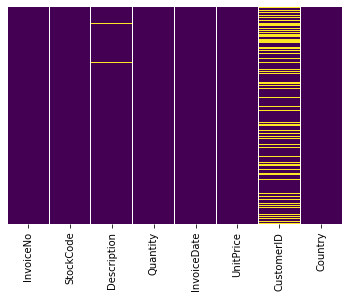

In [4]:

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [10]:
print('Number of null values per column:')
df.isnull().sum()

Number of null values per column:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_price    0
month_year     0
dtype: int64

In [11]:
print('Data type of each column:')
df.dtypes

Data type of each column:


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
total_price           float64
month_year          period[M]
dtype: object

In [7]:
#Setting the date column to datetime
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')

#Adding a total price column
df['total_price'] = df['Quantity']*df['UnitPrice']

#extracting the month and year from each date to a new column
df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

#Filling in missing values
df['Description'] = df['Description'].fillna('No description')
df['CustomerID'] = df['CustomerID'].fillna(0)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


### Creating a monthly report where all columns are in a list

In [9]:
#Grouping by monthly period
monthly_rep = df.groupby('month_year').agg(list)


Getting the total number of sales for each month 

In [13]:
monthly_rep['total_orders'] = monthly_rep['InvoiceNo'].apply(len)
print('A monthly report of number of sales:')
monthly_rep['total_orders']

A monthly report of number of sales:


month_year
2010-12    42481
2011-01    35147
2011-02    27707
2011-03    36748
2011-04    29916
2011-05    37030
2011-06    36874
2011-07    39518
2011-08    35284
2011-09    50226
2011-10    60742
2011-11    84711
2011-12    25525
Freq: M, Name: total_orders, dtype: int64

Plotting this data

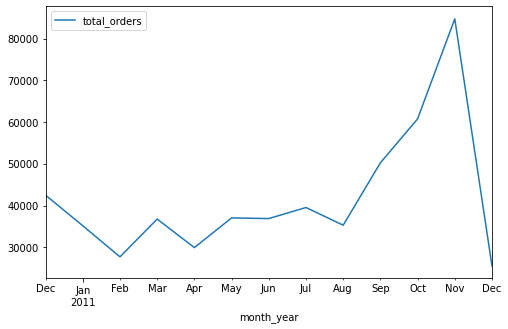

In [ ]:
monthly_rep.plot(figsize= (8,5))

### Taking the mean of the total price for each months sales

In [14]:
avg_price_monthly = monthly_rep['total_price'].apply(lambda x:mean(x))
print( 'monthly report of the average revenue per sale:')
avg_price_monthly

monthly report of the average revenue per sale:


month_year
2010-12    17.630400
2011-01    15.933088
2011-02    17.976058
2011-03    18.593313
2011-04    16.486399
2011-05    19.533716
2011-06    18.742830
2011-07    17.240248
2011-08    19.348161
2011-09    20.301987
2011-10    17.627089
2011-11    17.255802
2011-12    16.989932
Freq: M, Name: total_price, dtype: float64

Plotting this data

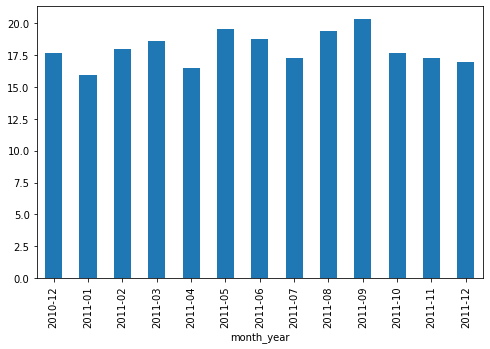

In [ ]:
avg_price_monthly.plot.bar(figsize= (8,5))

### Finding how many orders in average do customers do monthly

First I group by the month and customer and find out how many orders each customer made

In [16]:
date_customer = df.groupby(['month_year','CustomerID']).agg({'InvoiceNo':list}).reset_index()
date_customer['total_orders'] = date_customer['InvoiceNo'].apply(len)


Then using another groupby, I list all total orders from all customers

In [17]:
date_customer = date_customer.groupby('month_year').agg({'total_orders': list})


Now for each month I can calculate the mean

In [18]:
date_customer['avg_orders'] = date_customer['total_orders'].apply(lambda x: mean(x))

In [21]:
print('Monthly report of Average number of orders customers make per month')
date_customer['avg_orders'] 

Monthly report of Average number of orders customers make per month


month_year
2010-12    44.763962
2011-01    44.830357
2011-02    34.677096
2011-03    35.992165
2011-04    33.240000
2011-05    34.287037
2011-06    35.051331
2011-07    39.756539
2011-08    35.967380
2011-09    38.546431
2011-10    42.596073
2011-11    49.480724
2011-12    37.154294
Freq: M, Name: avg_orders, dtype: float64

### Finding how many customers only made one purchase

By subtracting the amount of customers that appear more than once from the length of the entire dataframe, I will get the number of one time customers

In [ ]:
filt = df.duplicated(subset=['CustomerID'], keep=False)
one_timers = len(df)-len(df[filt])
one_timers


79

### Finding how many customers  made multiple orders

By subtracting the one time buyers from the total customers I will get The number of multiple purchase customers

In [ ]:
len(df['CustomerID'].value_counts())-one_timers

4294